In [1]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")
environment.reset()

nb_states = environment.observation_space.n
nb_actions = environment.action_space.n
qtable = np.zeros((nb_states, nb_actions))

print("Q-table:")
print(qtable)

Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [3]:
action = environment.action_space.sample()
new_state, reward, done, info, _ = environment.step(action)

In [4]:
episodes = 1000 # episode
alpha = 0.5 # learning rate
gamma = 0.9 # discount rate

outcomes = []	

In [5]:
# training
for _ in tqdm(range(episodes)):
    
    state, _ = environment.reset()
    done = False 
    outcomes.append("Failure")
    
    while not done:
        
        # action
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        else:
            action = environment.action_space.sample()
            
        new_state, reward, done, info, _ = environment.step(action)
        
        # update q table
        qtable[state, action] =  qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state
        
        if reward:
            outcomes[-1] = "Success"
        
print("Qtable After Training: ")  
print(qtable)

100%|██████████| 1000/1000 [00:00<00:00, 3599.80it/s]

Qtable After Training: 
[[0.       0.       0.59049  0.      ]
 [0.       0.       0.6561   0.      ]
 [0.       0.729    0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.9      0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.421875 0.      ]
 [0.       0.       1.       0.      ]
 [0.       0.       0.       0.      ]]


<BarContainer object of 1000 artists>

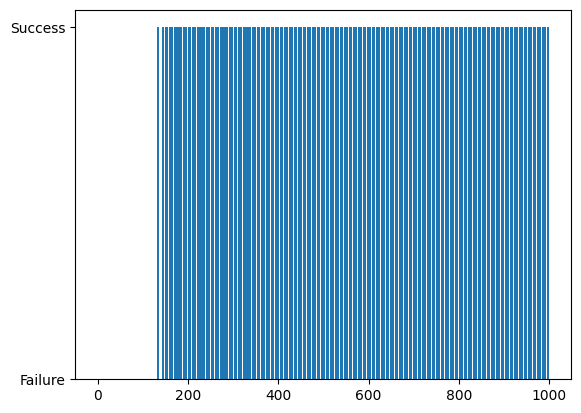

In [6]:
plt.bar(range(episodes), outcomes)

In [7]:
episodes = 100
nb_success = 0

for _ in tqdm(range(episodes)):
    
    state, _ = environment.reset()
    done = False 
    
    while not done: 
        
        # action
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        else:
            action = environment.action_space.sample()
            
        new_state, reward, done, info, _ = environment.step(action)
                
        state = new_state
        
        nb_success += reward
        
print("Success rate:", 100*nb_success/episodes)  

100%|██████████| 100/100 [00:00<00:00, 2326.59it/s]

Success rate: 100.0
